In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Steam games

In dit notebook is een data analyse voor steam games. Daarnaast wordt de library pandas vergeleken met 'vanilla' python bij het uitvoeren van de opdrachten om te laten zien waarom pandas het uitvoeren van data science projecten versneld.

## Data inladen

De data wordt in de volgende functie ingeladen in een pandas dataframe.

In [2]:
df = pd.read_json('./steam.json')

In [3]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
len(df)

27065

De dataframe kan op verschillende manieren worden gesorteerd. In volgende functie wordt de dataframe gesorteerd op kolom "price". Hierbij wordt het duurste spel eerst getoond.

## Data sorteren

In [5]:
df.sort_values(by=["price"], ascending=False).head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
21095,821800,ADR-Labelling Game,2018-04-12,1,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,windows,0,Single-player,Simulation,Simulation;Difficult,0,1,0,0,0,0-20000,421.99
13055,585610,GameMaker Studio 2 UWP,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Edu...,Game Development;Design & Illustration;Utilities,0,1,0,0,0,0-20000,303.99
10027,502570,Houdini Indie,2018-10-10,1,SideFX,SideFX,windows,0,Partial Controller Support;Steam Cloud,Animation & Modeling;Design & Illustration;Gam...,Animation & Modeling;Game Development;3D,0,23,0,0,0,0-20000,209.99
25558,977200,Bible Test,2018-11-27,1,FIRST_UKRAINIAN,FIRST_UKRAINIAN,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie;Simulation,Indie;Casual;Adventure,5,24,6,0,0,0-20000,154.99
10903,526310,Silhouette,2016-11-13,1,Apeirogon Games,Apeirogon Games,windows,0,Single-player;Partial Controller Support,Adventure;Indie;Early Access,Early Access;Adventure;Indie,0,13,4,0,0,0-20000,154.99


Laten we nu hetzelfde doen zonder pandas.

In [6]:
import json

with open('./steam.json') as f:
    data = json.load(f)
data[:3]

[{'appid': 10,
  'name': 'Counter-Strike',
  'release_date': '2000-11-01',
  'english': 1,
  'developer': 'Valve',
  'publisher': 'Valve',
  'platforms': 'windows;mac;linux',
  'required_age': 0,
  'categories': 'Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled',
  'genres': 'Action',
  'steamspy_tags': 'Action;FPS;Multiplayer',
  'achievements': 0,
  'positive_ratings': 124534,
  'negative_ratings': 3339,
  'average_playtime': 17612,
  'median_playtime': 317,
  'owners': '10000000-20000000',
  'price': 7.19},
 {'appid': 20,
  'name': 'Team Fortress Classic',
  'release_date': '1999-04-01',
  'english': 1,
  'developer': 'Valve',
  'publisher': 'Valve',
  'platforms': 'windows;mac;linux',
  'required_age': 0,
  'categories': 'Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled',
  'genres': 'Action',
  'steamspy_tags': 'Action;FPS;Multiplayer',
  'achievements': 0,
  'positive_ratings': 3318,
  'negative_ratings': 633,
  'average_pla

Dat was nog niet zo moeilijk. Laten we nu proberen dit te sortern op prijs net zoals eerder.

In [7]:
def sort_func(x):
    return x['price']

data.sort(key=sort_func, reverse=True)

data[:3]

[{'appid': 821800,
  'name': 'ADR-Labelling Game',
  'release_date': '2018-04-12',
  'english': 1,
  'developer': 'Suomen Kuljetusturva Oy',
  'publisher': 'Suomen Kuljetusturva Oy',
  'platforms': 'windows',
  'required_age': 0,
  'categories': 'Single-player',
  'genres': 'Simulation',
  'steamspy_tags': 'Simulation;Difficult',
  'achievements': 0,
  'positive_ratings': 1,
  'negative_ratings': 0,
  'average_playtime': 0,
  'median_playtime': 0,
  'owners': '0-20000',
  'price': 421.99},
 {'appid': 585610,
  'name': 'GameMaker Studio 2 UWP',
  'release_date': '2017-03-08',
  'english': 1,
  'developer': 'YoYo Games Ltd.',
  'publisher': 'YoYo Games Ltd.',
  'platforms': 'windows;mac',
  'required_age': 0,
  'categories': 'In-App Purchases',
  'genres': 'Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Web Publishing;Game Development',
  'steamspy_tags': 'Game Development;Design & Illustration;Utilities',
  'achievements': 0,
  'positive_ratings': 1,
  

Dit is opzich prima te doen, maar koste mij veel meer tijd om voor elkaar te krijgen door meer zoek werk. Laten we nu een eigen sorteer algoritme gebruiken. Het is mogelijk om deze functie aan te roepen met een func parameter. Deze paramter geeft standaard de waarde terug die hij als input krijgt. Door deze waarde aan te passen kunnen we de json data sorteren. Ook hier kunnen we de lijst omkeren aan het einde van het sorteren.

In [8]:
def swap(lst, i, j):
    x = lst[i]
    y = lst[j]

    lst[i] = y
    lst[j] = x

def my_sort(lst, func=lambda x: x, reverse=False):  
    steps = 0

    while True:
        swapped = False

        for i in range(len(lst)-1):
            steps += 1
            if func(lst[i]) > func(lst[i+1]):
                swap(lst, i, (i+1))
                swapped = True

        if not swapped:
            break
    
    if reverse:
        lst.reverse()

    return steps

Test op een lijst van getallen.

In [9]:
n = [5, 8, 3, 13, 1, 6]
my_sort(n)

25

De lijst is in 25 stappen gesorteerd. De lijst is van klein naar groot gesorteerd.

In [10]:
n

[1, 3, 5, 6, 8, 13]

Laten we nu de json data sorteren met de func parameter.

In [ ]:
my_sort(data, func=lambda x: x["price"])

In [ ]:
data

Het sorteren van deze data duurt een lange tijd en gaat nooit binnen acceptabele tijd executen. Waarschijnlijk omdat de dataset te groot is voor dit sorteer algoritme. Voor echte data science projecten is de lengte van de json data bijna niets.

## Beschrijvende statistiek

"The pandas way"

In [11]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.706500e+04,27065.000000,27065.000000,27065.000000,2.706500e+04,27065.000000,27065.000000,27065.000000,27065.000000
mean,5.962736e+05,0.981415,0.354369,45.263551,1.000514e+03,211.065213,149.842786,146.096471,6.075303
std,2.508814e+05,0.135056,2.404089,352.734535,1.899214e+04,4285.728049,1827.372593,2354.313055,7.872129
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.013600e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000
50%,5.990900e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000
75%,7.988300e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.000000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,421.990000


In [23]:
df.corr()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
appid,1.000000,-0.119305,-0.087558,0.040481,-0.070871,-0.052209,-0.070253,-0.048323,-0.151818
english,-0.119305,1.000000,0.004580,0.013999,0.005946,0.005673,0.000165,-0.003576,0.010798
required_age,-0.087558,0.004580,1.000000,-0.005435,0.060484,0.057648,0.034477,0.014777,0.120267
achievements,0.040481,0.013999,-0.005435,1.000000,0.006059,0.003577,0.014173,0.009955,-0.007951
positive_ratings,-0.070871,0.005946,0.060484,0.006059,1.000000,0.762806,0.157894,0.035773,0.036162
negative_ratings,-0.052209,0.005673,0.057648,0.003577,0.762806,1.000000,0.161139,0.047886,0.051305
average_playtime,-0.070253,0.000165,0.034477,0.014173,0.157894,0.161139,1.000000,0.914900,0.049306
median_playtime,-0.048323,-0.003576,0.014777,0.009955,0.035773,0.047886,0.914900,1.000000,0.036657
price,-0.151818,0.010798,0.120267,-0.007951,0.036162,0.051305,0.049306,0.036657,1.000000


<AxesSubplot:>

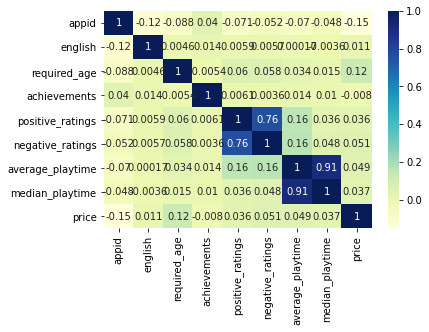

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Dat was makkelijk! Laten we het nu met eigen functies proberen.

In [21]:
def mean(lst, func=lambda x: x):
    """ Retourneert het gemiddelde (float) van de lijst lst. """
    values = list(map(func, lst))
    return float(sum(values)/len(values))

In [22]:
mean(data, func=lambda x: x["price"])

6.075302789581262

In [30]:
def rnge(lst, func=lambda x: x):
    """ Retourneert het bereik (int) van de lijst lst. """
    values = list(map(func, lst))
    return max(values) - min(values)

In [31]:
rnge(data, func=lambda x: x["price"])

421.99

In [39]:
def median(lst, func=lambda x: x):
    """ Retourneert de mediaan (float) van de lijst lst. """
    m = None
    
    
    values = list(map(func, lst))
    
    values = sorted(values)

    while True:
        if len(values) > 2:
            values.pop(0)
            values.pop(-1)
        elif len(values) == 2:
            m = mean(values)
            break
        elif len(values) < 2:
            m = values[0]
            break

    return m

In [40]:
median(data, func=lambda x: x["price"])

3.99

In [49]:
def q1(lst, func=lambda x: x):
    """
    Retourneert het eerste kwartiel Q1 (float) van de lijst lst.
    Tip: maak gebruik van median()
    """

    values = list(map(func, lst))
    
    m = median(values)

    new_lst = []

    for n in values:
        if n <= m:
            new_lst.append(n)

    if m in new_lst:
        del new_lst[-1]

    m = median(new_lst)

    return m

In [50]:
q1(data, func=lambda x: x["price"])

1.69

In [51]:
def q3(lst, func=lambda x: x):
    """ Retourneert het derde kwartiel Q3 (float) van de lijst lst. """
    
    values = list(map(func, lst))
    
    m = median(values)

    new_lst = []

    for n in values:
        if n >= m:
            new_lst.append(n)

    if m in new_lst:
        del new_lst[0]

    m = median(new_lst)

    return m

In [52]:
q3(data, lambda x: x["price"])

6.99

In [56]:
def var(lst, func=lambda x: x):
    """ Retourneert de variantie (float) van de lijst lst. """
    values = list(map(func, lst))
    
    m = mean(values)

    v = 0

    for n in values:
        v += (n - m)**2

    v = v / len(values)

    return v

In [57]:
var(data, func=lambda x: x["price"])

61.96812370013764

In [58]:
def std(lst, func=lambda x: x):
    """ Retourneert de standaardafwijking (float) van de lijst lst. """
    values = list(map(func, lst))
    
    return var(values)**(1/2)

In [59]:
std(data, func=lambda x: x["price"])

7.87198346670886